# Class 1 - Phase identification - Single-Bus structure

## Agenda
- Problem Description
- Problem Implementation
- Alternative Problems
- Wrap-Up

## Problem Description

- While the connectivity model of low voltage (LV) grids is usually known, the phase connectivity information of single-phase connected customers is often erroneous or missing. This is due to many reasons including maintenance and other load balancing initiatives that usually do not update phase connectivity information and do not keep track of its changes in a systematic way.

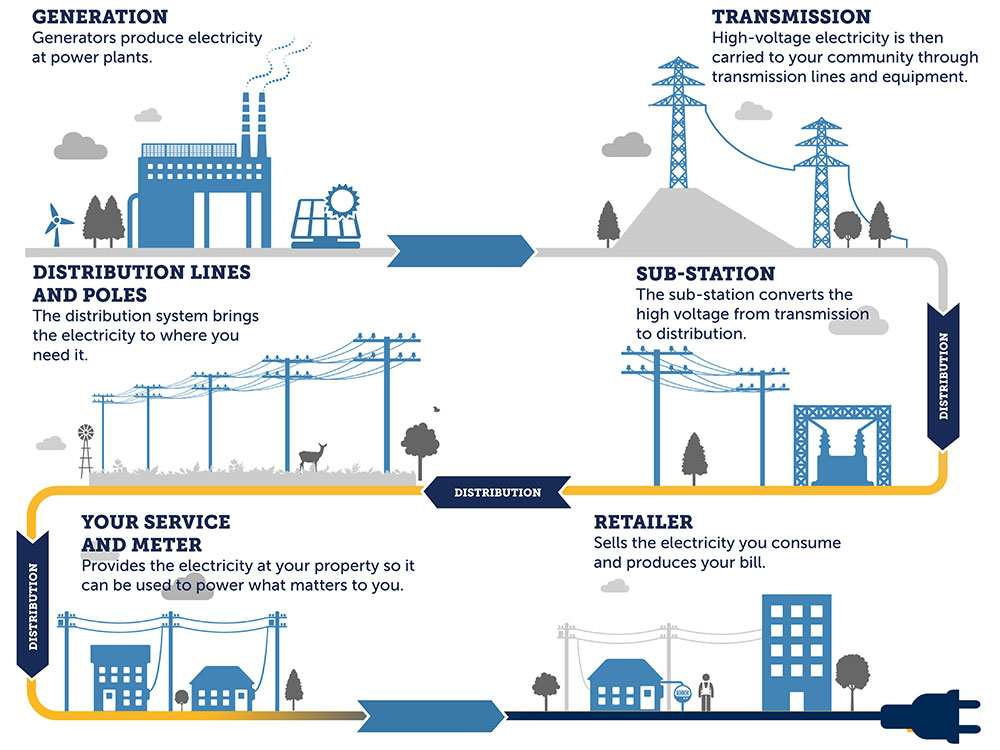
https://www.fortisalberta.com/about-us/our-company/blog/fortisalbertablog/2019/08/20/we-explain-the-complex-sophisticated-system-that-brings-electricity-to-you




- With the deployment of smart metering and the consequent availability
of high-resolution consumption data, phase connectivity
should be possible to estimate if data on per-phase aggregate energy
measurements would be available at substation sites with the
same resolutio.

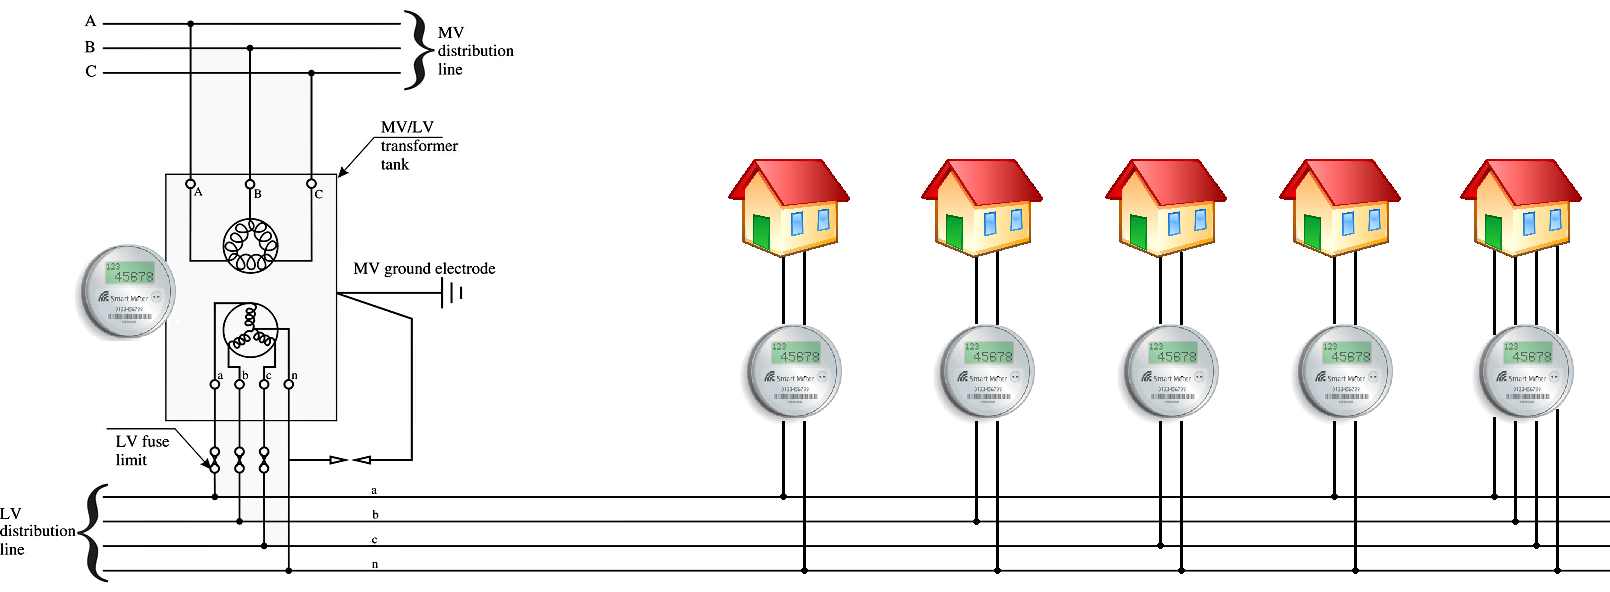

<b>Consider <i>N</i> customers whose connection phase assumes one out of three possible labels <i>a, b, </i> or <i> c</i> and estimate the correct customer-to-label assignment based on <i>M</i> readings whose per-phase values are a <i>function</i> of the corresponding phase-connected individual customer reading.</b>

## Problem Description

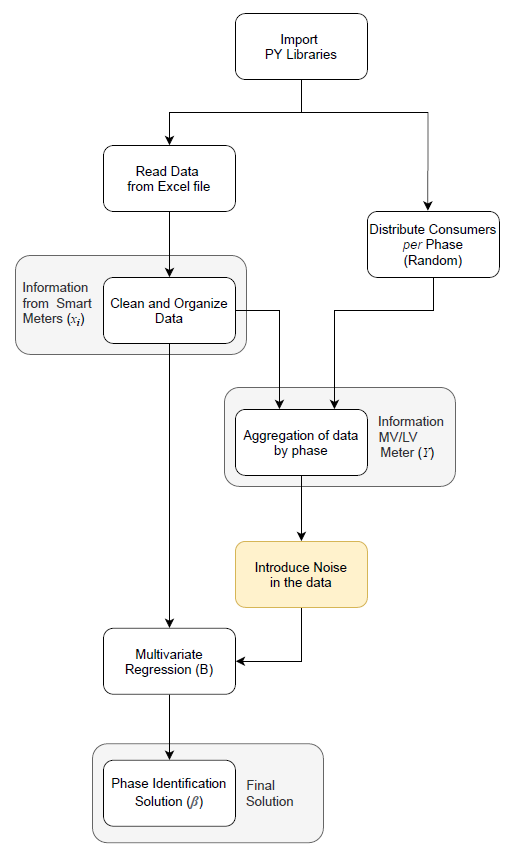

Import Python Libraries

In [170]:
import pandas as pd
import numpy as np
from numpy.random import randint   # To random values in the phases
from numpy.random import random   # To random values in the phases
import matplotlib.pyplot as plt


Parameters (It is possible to change to test different input data)

In [171]:
nc=4                        # Number of consumers (1 to nc)                  %%Data Notes: nc=4
ts=60                     #start period of analysis (Can be from 1 to 96)  %%Data Notes: ts=60
te=71                       #Last period of analysis (Can be from 1 to 96)   %%Data Notes: te=71
#phase = [3,2,1,3]            #To obtain the same values of lecture notes
noise = 0.25
phase = randint(1, 4, nc)  #To obtain random values

phase_idx = np.array(phase) - 1

print ("The distribution of consumers in each phase is: ", phase)

The distribution of consumers in each phase is:  [1 2 2 3]


Import data (From Excel file)

In [172]:
raw_data = np.array(pd.read_excel ('Prob1_Conso_Data.xlsx', header=None))

Clean and organize the data (delete zeros and organize by consumers)

In [173]:
checks=0
nr=1
data=np.zeros((1,96))
#h=np.arange(1/96, 1, 1/96).tolist()
h=raw_data[0:96,0]
for i in range(1,raw_data.shape[0]+1):
    if i==0:
        print(i)
    if raw_data[i-1,0]==h[checks]:
        checks=checks+1
    else:
        checks=0
    if checks==96:
        if np.sum(raw_data[i-96:i,1])!=0:
            data[nr-1,0:96]=raw_data[i-96:i,1]
            data.resize((nr+1,96))
            nr=nr+1
        checks=0
data.resize((nr-1,96))

data.shape[0]      #Can be deleted
print ("The number of consumers is ", data.shape[0], " and the number of periods is ", data.shape[1])

The number of consumers is  1390  and the number of periods is  96


Select data from consumers and period (Truncate the original matrix) 

In [174]:
data_Aux1=data[0:nc,:]
pw=data_Aux1[:,ts-1:te]


power = 4 * pw                      
power_T = power.T

print ("The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)")
print ("In the lecture notes, this value is represented by X.")
print ("The value of X is:\n",np.transpose(4*pw))   # We should multiply by 4 to obtain the same values of the lectures. 
                                                    # In fact the original values are the average energy consumption for
                                                    # 15 minutes. To obtain the power, we should multiply by 4  

The matrix 'pw' represents the power measured by the smart meter in each consumer (i) in each period (k)
In the lecture notes, this value is represented by X.
The value of X is:
 [[0.332 0.064 0.084 0.12 ]
 [0.236 0.164 0.276 0.064]
 [0.224 0.708 1.572 0.072]
 [0.36  3.44  1.188 0.18 ]
 [1.332 2.176 0.484 1.464]
 [1.516 3.02  0.316 0.624]
 [0.92  0.916 0.404 2.772]
 [0.752 0.64  0.396 1.464]
 [1.828 0.684 0.576 0.576]
 [3.568 0.564 0.828 0.428]
 [0.78  0.356 0.728 0.348]
 [0.856 0.22  0.308 0.12 ]]


Consumers aggregation by phase and noise inclusion (normal distribution).

In [175]:
## Calculate the total power consumed in each phase (f) in each period (k)
# Create a matrix Y of size (number of periods, number of phases) to store the total power consumed in each phase in each period


n_periods = power_T.shape[0]   # Number of periods (rows) in the power_T matrix
Y = np.zeros((n_periods, 3))   # Initialize the Y matrix with zeros (3 columns for 3 phases)

for f in range(3):                 
    Y[:, f] = power_T[:, phase_idx == f].sum(axis=1)
print ("The matrix 'Y' represents the total power consumed in each phase (f) in each period (k)")
print ("In the lecture notes, this value is represented by Y.")
print ("The value of Y is:\n",Y)

# Add noise to Y with gaussian distribuition
noise_matrix = noise * np.random.randn(*Y.shape)
Y_noisy = Y + noise_matrix
print ("The matrix 'Y_noisy' represents the total power consumed in each phase (f) in each period (k) with noise added.")
print ("The value of Y_noisy is:\n",Y_noisy)

The matrix 'Y' represents the total power consumed in each phase (f) in each period (k)
In the lecture notes, this value is represented by Y.
The value of Y is:
 [[0.332 0.148 0.12 ]
 [0.236 0.44  0.064]
 [0.224 2.28  0.072]
 [0.36  4.628 0.18 ]
 [1.332 2.66  1.464]
 [1.516 3.336 0.624]
 [0.92  1.32  2.772]
 [0.752 1.036 1.464]
 [1.828 1.26  0.576]
 [3.568 1.392 0.428]
 [0.78  1.084 0.348]
 [0.856 0.528 0.12 ]]
The matrix 'Y_noisy' represents the total power consumed in each phase (f) in each period (k) with noise added.
The value of Y_noisy is:
 [[0.61791228 0.04973069 0.63392928]
 [0.21902073 0.54159324 0.09984839]
 [0.1940102  2.39546247 0.10685357]
 [0.24525148 4.70229977 0.31209248]
 [1.18455734 2.48313726 1.71344165]
 [1.11643843 3.104851   0.74107601]
 [1.30633489 1.04866512 2.4374748 ]
 [1.03433843 1.00792529 1.69460831]
 [1.66587236 1.29114377 0.70079609]
 [4.00615079 1.70626873 0.22417128]
 [0.81979724 1.14725113 0.24971863]
 [0.663678   0.29431705 0.39862878]]


Multivariate Regression 

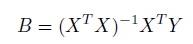

In [176]:
## Estimate the B matrix using least squares
B_est, residuals, rank, s = np.linalg.lstsq(power_T, Y_noisy, rcond=None) 
print("\nEstimated B matrix:\n", B_est)

# Calculate round B matrix 1 or 0 (highest value in each row is 1, the rest are 0)
B_round = np.zeros_like(B_est)
B_round[np.arange(B_est.shape[0]), B_est.argmax(axis=1)] = 1
print("\nRounded B matrix:\n", B_round)


Estimated B matrix:
 [[ 1.03787311  0.04349004 -0.00305928]
 [-0.14443681  0.94298469  0.06901484]
 [ 0.10030458  1.1415763  -0.01657438]
 [ 0.13789813 -0.11010926  0.94840673]]

Rounded B matrix:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Check accuracy

In [177]:
# Print the phase distribution given 
print("\nActual phase distribution for each consumer:\n", phase)

# Convert rounded B matrix to phase labels (1, 2, or 3)
estimated_phases = np.argmax(B_round, axis=1) + 1  # Add 1 to convert from 0-indexed to 1-indexed
print("\nEstimated phase distribution for each consumer:\n", estimated_phases)

# Compare estimated phases with actual phases
accuracy = np.mean(estimated_phases == phase)

# Print the accuracy of the estimation
print("\nAccuracy of phase estimation: {:.2f}%".format(accuracy * 100))



Actual phase distribution for each consumer:
 [1 2 2 3]

Estimated phase distribution for each consumer:
 [1 2 2 3]

Accuracy of phase estimation: 100.00%


Plot

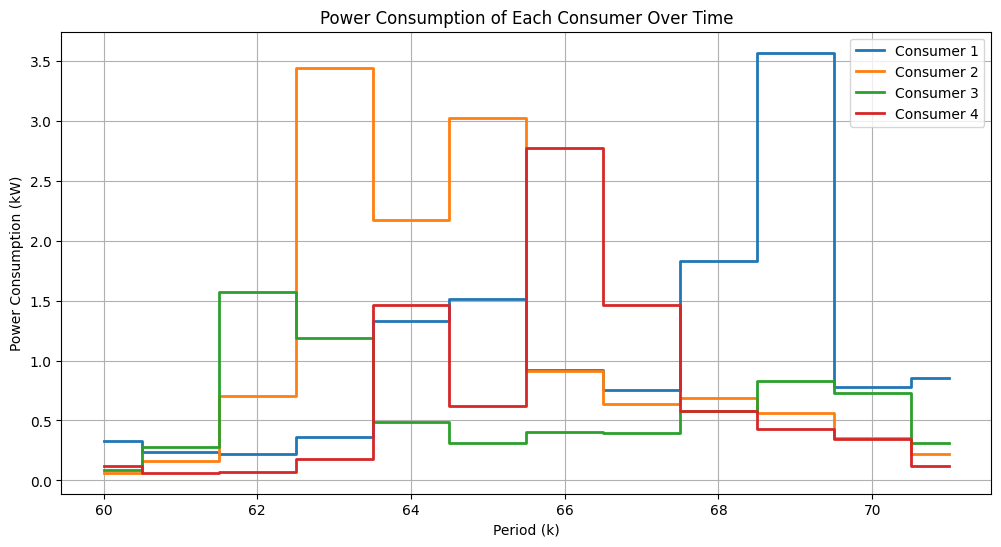

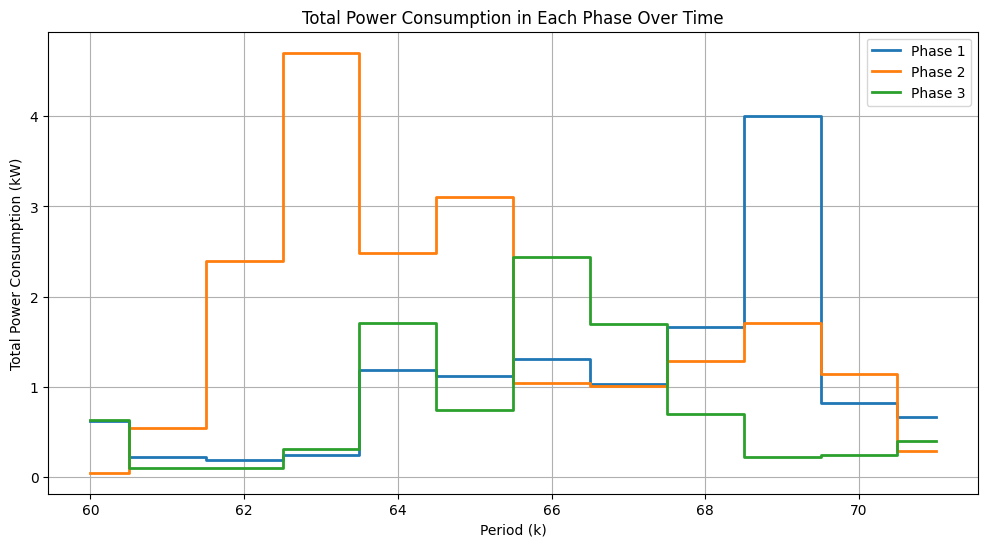

In [183]:
# Plot in the same graph the consumption of each consumer in each period

plt.figure(figsize=(12, 6))
for i in range(nc):
    plt.step(range(ts, te+1), power_T[:, i], label=f'Consumer {i+1}', where='mid', linewidth=2)
plt.title('Power Consumption of Each Consumer Over Time')
plt.xlabel('Period (k)')
plt.ylabel('Power Consumption (kW)')
plt.legend()
plt.grid()
plt.show()

# Plot of the power consuption of each phase in the substation in each period

plt.figure(figsize=(12, 6))
for f in range(3):
    plt.step(range(ts, te+1), Y_noisy[:, f], label=f'Phase {f+1}', where='mid', linewidth=2)
plt.title('Total Power Consumption in Each Phase Over Time')
plt.xlabel('Period (k)')
plt.ylabel('Total Power Consumption (kW)')
plt.legend()
plt.grid()
plt.show()



# Extra Challenges
Think about an interesting variation to this problem or a different way to solve and implement it !!!

Some ideas:
- What happens if we have two consumers with the same consumption ? What about if the difference is very small ? Can we quantify the sensitivity ?
- What happens if we have three-phase clients ? Can we follow the same approach ?

In [ ]:
# Idea 1
# What happens if we have two consumers with the same consumption? What about if the difference is very small? Can we quantify the sensitivity?


# First try to increase period of analysis to see if we can improve the estimation

if (accuracy < 1.0):
    print("\nThe estimation is not perfect. This could be due to consumers having similar consumption patterns, making it difficult to distinguish between them.")





In [ ]:
# Idea 2
# What happens if we have three-phase clients? Can we follow the same approach?
